In [301]:
from binascii import hexlify
def distance(a, b):
    return abs(a - b)

In [351]:
from random import randint
from sys import maxsize
from operator import itemgetter

class Node:
    HASH_ALGORITHM = hash
    KEYSPACE_SIZE = 16
    
    def __init__(self, *neighbors, id=None):
        self.dict = {}
        self.id = id or randint(0, self.KEYSPACE_SIZE)
        self.neighbors = set() | set(neighbors)
        for neighbor in self.neighbors:
            neighbor.neighbors.add(self)
            
    def hash(self, value):
        result = value % self.KEYSPACE_SIZE
        return result
        
    def neighbor_distance(self, key):
        return sorted(((neighbor, distance(neighbor.id, self.hash(key)))
                       for neighbor in self.neighbors),
                      key=itemgetter(1))
    
    def nearest_neighbor(self, key):
        return self.neighbor_distance(key)[0]
    
    def distance(self, key):
        return distance(self.id, self.hash(key))

    def __contains__(self, key):
        neighbor = self._find_neighbor(key)
        return key in neighbor
    
    def __repr__(self):
        return "<Node at {}>".format(self.id)
    
    def _find_neighbor(self, key):
        if not self.neighbors:
            return self.dict
        neighbor, distance = self.nearest_neighbor(key)
        if self.distance(key) <= distance:
            return self.dict
        return neighbor._find_neighbor(key)
    
    def __getitem__(self, key):
        neighbor = self._find_neighbor(key)
        return neighbor[key]
    
    def __setitem__(self, key, value):
        neighbor = self._find_neighbor(key)
        neighbor[key] = value

In [355]:
VALS = 1600
nodes = []
from random import choice, sample
for i in range(1, Node.KEYSPACE_SIZE):
    node = Node(*sample(nodes, min(1, len(nodes))), id=i)
    print("Created node {}".format(node.id))
    nodes.append(node)
nodes[-1].neighbors.add(nodes[0])

for i in range(VALS):
    choice(nodes)[i] = 'hello'
for i in range(VALS):
    assert i in choice(nodes)
    
for node in nodes:
    print(node, node.dict.keys())

Created node 1
Created node 2
Created node 3
Created node 4
Created node 5
Created node 6
Created node 7
Created node 8
Created node 9
Created node 10
Created node 11
Created node 12
Created node 13
Created node 14
Created node 15


AssertionError: 

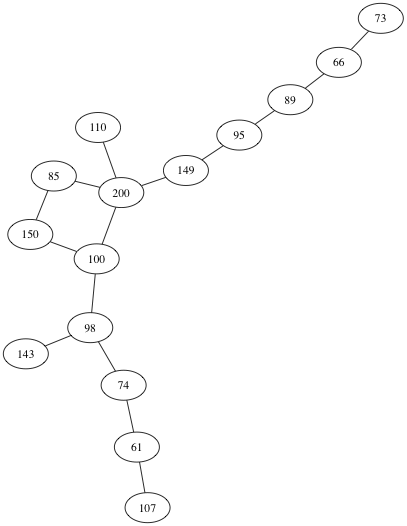

In [356]:
import networkx as nx
from nxpd import draw
G = nx.Graph()
G.graph['rankdir'] = 'LR'
G.graph['dpi'] = 60
for node in nodes:
    G.add_node(node.id, label=len(node.dict))
    for neighbor in node.neighbors:
        G.add_edge(node.id, neighbor.id)
draw(G, layout='neato')